# __Chapter 5: Support Vector Machines__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SVM is a very powerful and versatile Machine Learning model and particularly well suited for classification of complex but small-or medium-sized datasets.

---

# Linear SVM Classification

Note that adding more training instances beyond support vector will not affect the decision boundary at all, also SVMs are sensitive to the feature scales.

## Soft Margin Classification

If we strictly impose that all instances be off the street and on the right side, this is called hard margin classification. There are two main issues with hard margin classification. First, it only works if the data is linearly separable, and second it is quite sensitive to outliers.

To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called soft margin classification.

In scikit-learn, we can use the hyperparameter C to control this balance. Smaller C value leads to wider street but more margin classification (soft margin classification). So if the SVM model is overfitting, we can try to regularize it by reducing C.

In [2]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [19]:
iris = load_iris()
X = iris['data'][:, (2, 3)] # petal length, petal width
y = (iris['target'] == 2).astype(np.float64) # Iris-Virginica

In [4]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

In [6]:
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Using SVC(kernel='linear', C=1) is much slower, especially with large traning sets, so it is not recommended. Another option is to use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/(m * C)). This applies regular Stochastic Gradient Descent to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory (out-of-core training), or to handle online classification tasks.

The LinearSVC class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the StandardScaler. Moreover, make sure
you set the loss hyperparameter to "hinge", as it is not the default
value. Finally, for better performance you should set the dual
hyperparameter to False, unless there are more features than
training instances.

---

# Nonlinear SVM Classification

Adding more features(polynomial term) will probably make the data linearly seperable.

In [24]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [51]:
X, y = make_moons(n_samples=100, random_state=42, noise=0.1)

In [52]:
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=100000))
])

In [53]:
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=100000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [54]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

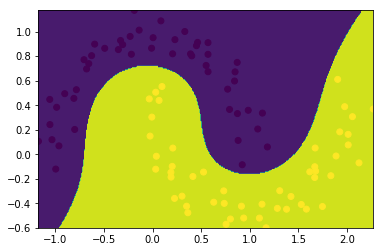

In [55]:
plt.contourf(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(X[:, 0].min(), X[:, 0].max())
plt.ylim(X[:, 1].min(), X[:, 1].max());

## Polynomial Kernel

Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.

Miraculous mathematical technique called the kernel trick, makes the model posible to get the same result as if we added many polynomial features, without having to add them. So there is combinatorial explosion of the number of features since we dont actually add any features.

In [49]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

In [50]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [56]:
def draw_decision_boundary(model, X, y, intensity=0.01):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, intensity),
                         np.arange(y_min, y_max, intensity))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(X[:, 0].min(), X[:, 0].max())
    plt.ylim(X[:, 1].min(), X[:, 1].max());

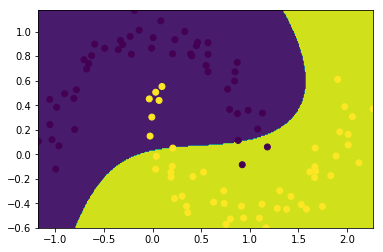

In [57]:
draw_decision_boundary(poly_kernel_svm_clf, X, y)

In [58]:
X, y = make_moons(n_samples=100, random_state=42, noise=0.25)

In [59]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=1, C=5))
])

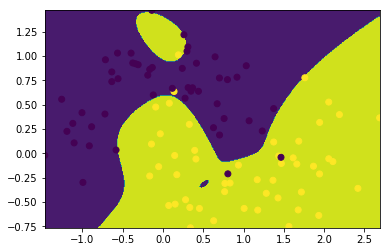

In [61]:
poly_kernel_svm_clf.fit(X, y)
draw_decision_boundary(poly_kernel_svm_clf, X, y)

This is a strong sign that model is overfit the data (training data)

## Adding Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark.

Gaussian RBF (Radial Basis Function):

$\phi\gamma(x, l) = exp\:(-\,\gamma \left\lVert \, x - l \, \right\rVert ^2)$

It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).

You may wonder how to select the landmarks. The simplest approach is to create a landmark at the location of each and every instance in the dataset. This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. The downside is that a training set with m instances and n features gets transformed into a training set with m instances and m features (assuming you drop the original features). If your training set is very large, you end up with an equally large number of features.

## Gaussian RBF Kernel

Just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets. However, once again the kernel trick does its SVM magic: it makes it possible to obtain a similar result as if you had added many similarity features, without actually having to add them.

In [62]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

In [63]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Increasing gamma makes the bell-shape curve narrower and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. So γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the C hyperparameter).

With so many kernels to choose from, how can you decide which one to use? As a rule of thumb, you should always try the linear kernel first (remember that LinearSVC is much faster than SVC(ker nel="linear")), especially if the training set is very large or if it has plenty of features. If the training set is not too large, you should try the Gaussian RBF kernel as well; it works well in most cases. Then if you have spare time and computing power, you can also experiment with a few other kernels using cross-validation and grid search, especially if there are kernels specialized for your training set’s data structure.

## Computational Complexity

LinearSVC does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features: its training time complexity is roughly O(m × n). The algorithm takes longer if you require a very high precision. This is controlled by the tolerance hyperparameter ϵ (called tol in Scikit-Learn). In most classification tasks, the default tolerance is fine.

Time complexity for SVC class is between O(m^2 x n) and O(m^3 x n). trick.2 The training time complexity is usually between O(m2 × n) and O(m3 × n). Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large (e.g., hundreds of thousands of instances). This algorithm is perfect for complex but small or medium training sets. However, it scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features). In this case, the algorithm scales roughly with the average number of nonzero features per instance.

LinearSVC: 
- Time complexity: O(m x n)
- Out-of-core support: No
- Scaling required: Yes
- Kernel trick: No

SGDClassifier:
- Time complexity: O(m x n)
- Out-of-core support: Yes
- Scaling required: Yes
- Kernel trick: No
SVC:
- Time complexity: O(m^2 x n) to O(m^3 x n)
- Out-of-core support: No
- Scaling required: Yes
- Kernel trick: Yes

---